[[52.19923976 20.94071435  0.        ]
 [52.2430455  21.08284     0.        ]
 [52.23519123 20.99183092  0.        ]
 [52.2797638  20.93836058  0.        ]
 [52.27932091 21.02331518  0.        ]
 [52.19002946 21.00938146  0.        ]]


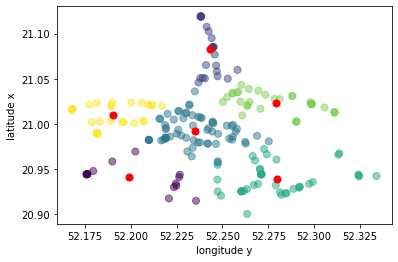

In [13]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from mwprojekt.velocity_analytics import compute_velocity

int_1 = pd.read_json('../data/03.02.2021-0.json')
int_1 = pd.json_normalize(int_1['result'])
int_2 = pd.read_json('../data/03.02.2021-0.json')
int_2 = pd.json_normalize(int_2['result'])

df = compute_velocity(int_1, int_2)
df = df.dropna()


  
df = pd.DataFrame(df,columns=['Lat_x','Lon_y','kph'])

kmeans = KMeans(n_clusters=6).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)
col = np.where(df['kph']>50,'k',np.where(df['kph']<5,'b','r'))

plt.scatter(df['Lat_x'], df['Lon_y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.xlabel("longitude y")
plt.ylabel("latitude x")
plt.show()


In [3]:
#todo legendam czerowne kropki 
#linia ktora najwiecej razy przekrasza